In [5]:
import pandas as pd
import duckdb as db
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from difflib import get_close_matches

plt.style.use('efrem.mplstyle')

df_sökande= pd.read_csv(
    "../data/2024_kurser/Ansökande_2020-2024.csv",
    encoding="latin-1"
)
df = pd.read_excel("../data/2024_kurser/inkomna-ansokningar-2024-for-kurser.xlsx")

df_sökande.head()


,kön,utbildningsområde MYH,region (hemlän),utbildningens studietakt,Antal ansökningar 2020,Antal ansökningar 2021,Antal ansökningar 2022,Antal ansökningar 2023,Antal ansökningar 2024,Antal sökande 2020,Antal sökande 2021,Antal sökande 2022,Antal sökande 2023,Antal sökande 2024
0,totalt,Data/It,Stockholms län,Heltid,399,230,55,463,244,375,189,54,413,229
1,totalt,Data/It,Uppsala län,Heltid,28,12,11,35,22,26,10,9,34,22
2,totalt,Data/It,Södermanlands län,Heltid,19,17,6,21,15,16,14,5,18,13
3,totalt,Data/It,Östergötlands län,Heltid,13,34,5,35,21,11,26,5,30,21
4,totalt,Data/It,Jönköpings län,Heltid,15,13,5,20,7,14,11,5,19,6


In [6]:
# Ta bort kolumnen "kön"
df_transformed = df_sökande.drop(columns=["kön"])

df_transformed["utbildningsområde MYH"] = df_transformed["utbildningsområde MYH"].str.replace("MYH", "", regex=False).str.strip()

# Rensa alla kolumnnamn från överflödiga mellanslag i början/slutet
df_transformed.columns = df_transformed.columns.str.strip()


# Ta bort "MYH" från kolumnen "utbildningsområde MYH"
df_transformed.columns = [col.replace("MYH", "").strip() for col in df_transformed.columns]
df_transformed.columns = [col[:1].upper() + col[1:] for col in df_transformed.columns]


df_transformed.head()

,Utbildningsområde,Region (hemlän),Utbildningens studietakt,Antal ansökningar 2020,Antal ansökningar 2021,Antal ansökningar 2022,Antal ansökningar 2023,Antal ansökningar 2024,Antal sökande 2020,Antal sökande 2021,Antal sökande 2022,Antal sökande 2023,Antal sökande 2024
0,Data/It,Stockholms län,Heltid,399,230,55,463,244,375,189,54,413,229
1,Data/It,Uppsala län,Heltid,28,12,11,35,22,26,10,9,34,22
2,Data/It,Södermanlands län,Heltid,19,17,6,21,15,16,14,5,18,13
3,Data/It,Östergötlands län,Heltid,13,34,5,35,21,11,26,5,30,21
4,Data/It,Jönköpings län,Heltid,15,13,5,20,7,14,11,5,19,6


In [7]:
df_top_omraden = db.query(
    """
    SELECT 
      "Sökt utbildningsområde" AS Utbildningsområde,
      SUM("Sökt antal platser 2024") AS År2024,
      SUM("Sökt antal platser 2025") AS År2025,
      SUM("Sökt antal platser 2025") - SUM("Sökt antal platser 2024") AS Tillväxt
    FROM df
    GROUP BY "Sökt utbildningsområde"
    ORDER BY Tillväxt DESC
    LIMIT 10
    """
).df().set_index("Utbildningsområde")

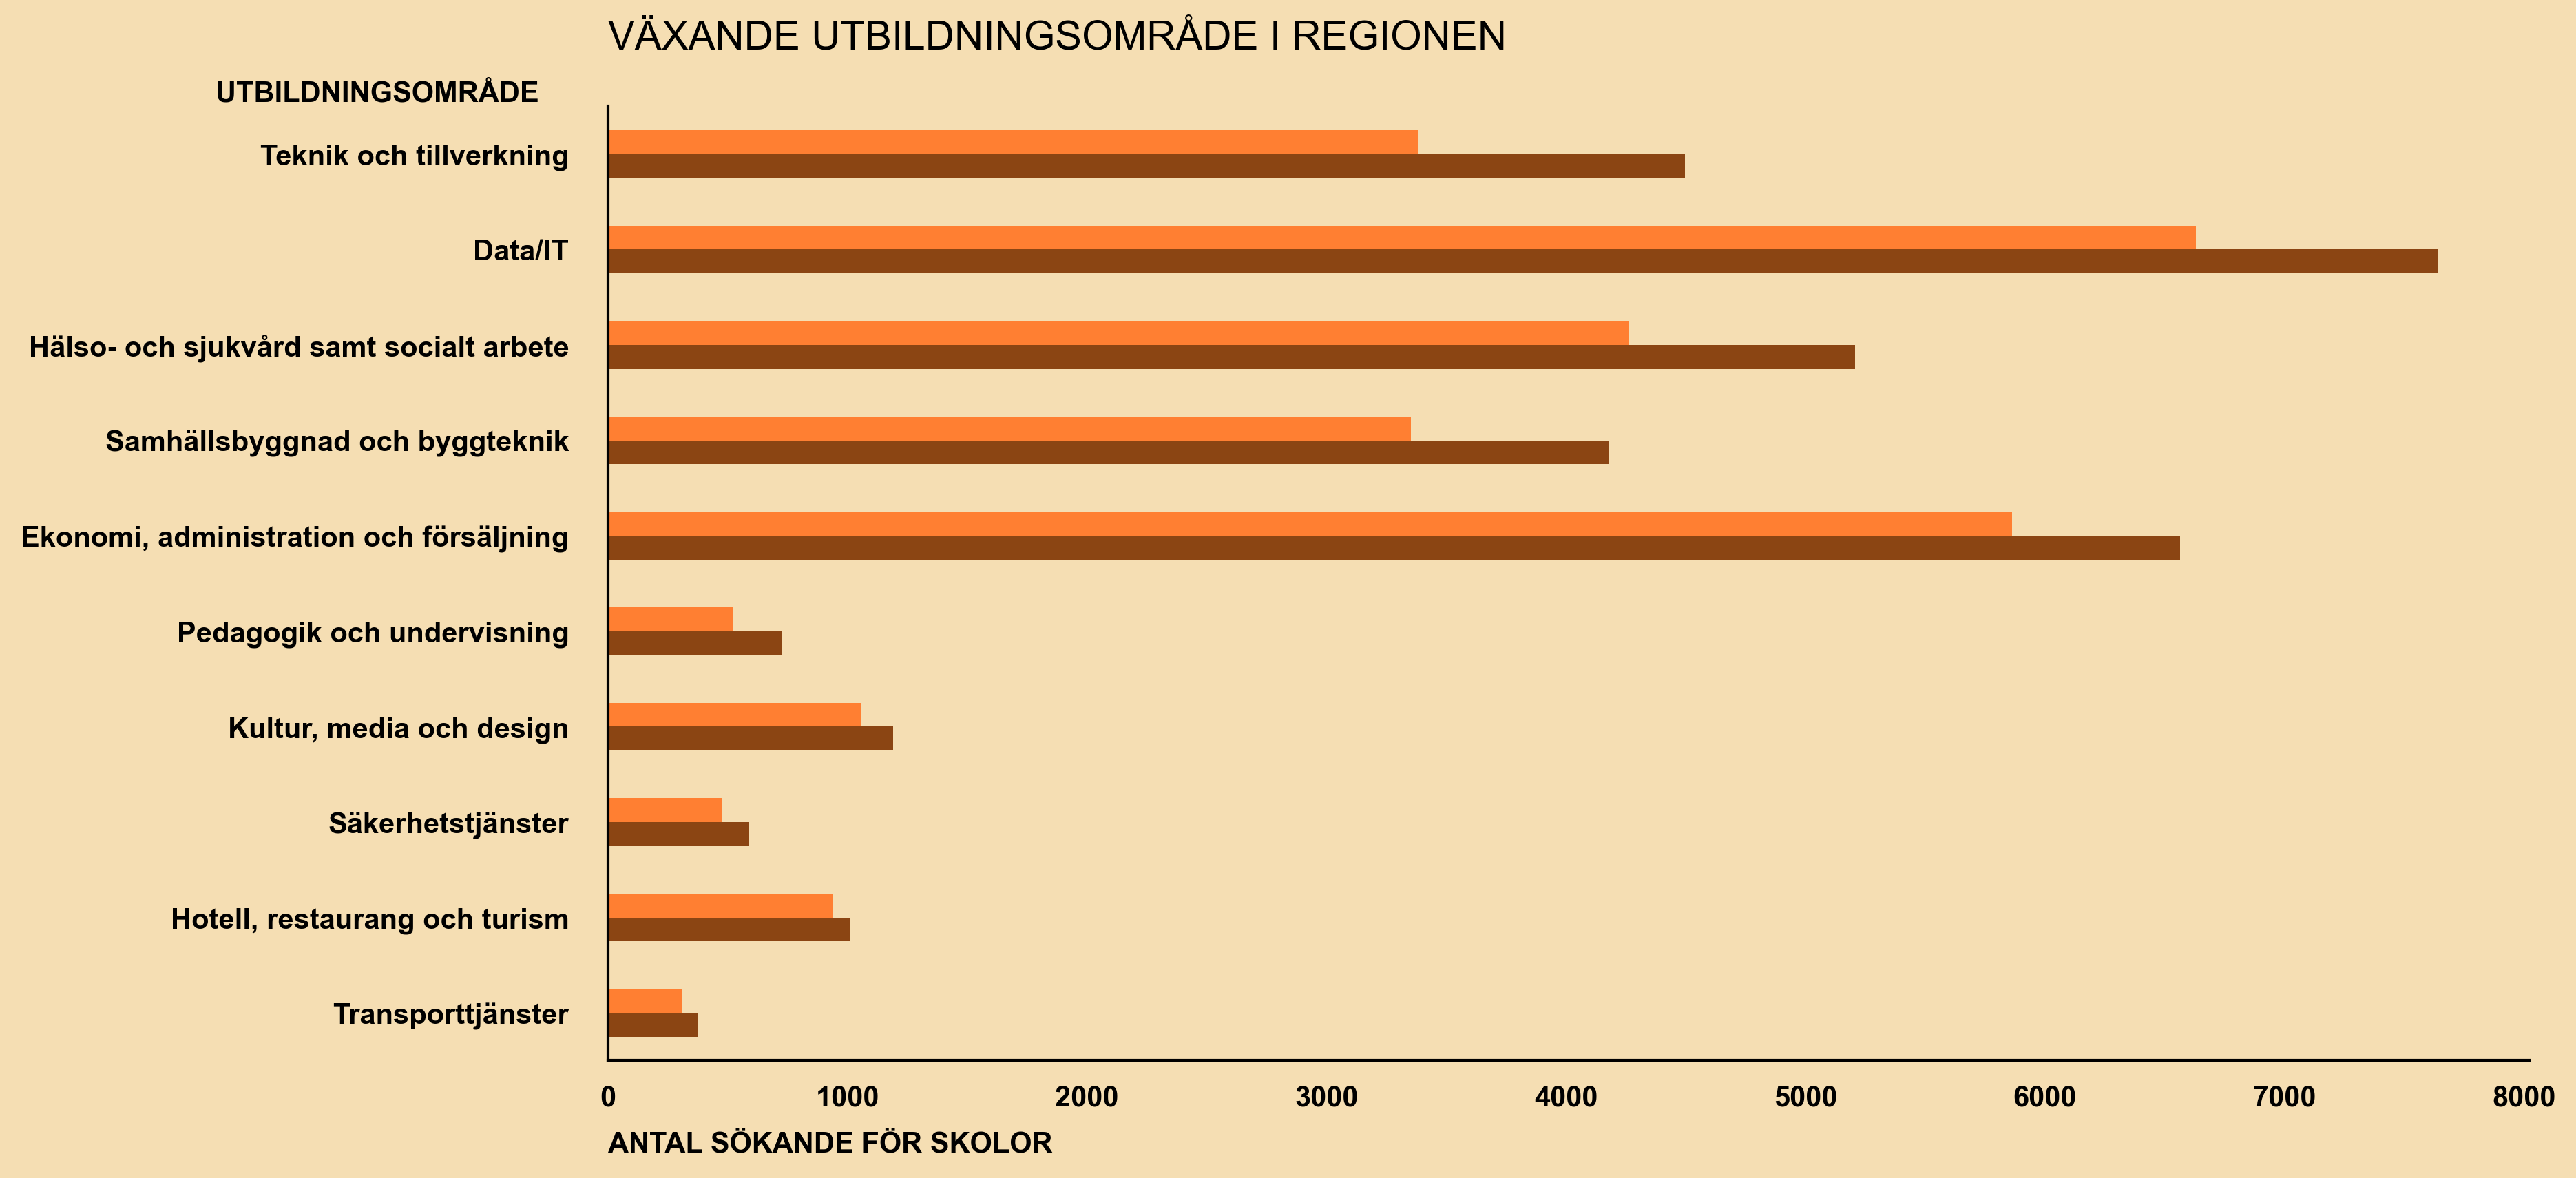

In [8]:
from utils.constant import DARK_ORANGE, SADDLEBROWN, WHEAT_BROWN

ax = df_top_omraden[["År2024", "År2025"]].plot(
    kind="barh",
    figsize=(12, 6),
    color=[DARK_ORANGE, SADDLEBROWN],
)

ax.set_title("VÄXANDE UTBILDNINGSOMRÅDE I REGIONEN", loc="left", pad=20)
ax.set_xlabel("ANTAL SÖKANDE FÖR SKOLOR", loc="left")
ax.set_ylabel("UTBILDNINGSOMRÅDE", rotation= 0)
ax.yaxis.set_label_coords(-0.12, 1)

ax.patch.set_facecolor(WHEAT_BROWN)
ax.invert_yaxis()
ax.legend().remove()